In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers , optimizers

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(25000,)

In [4]:
train_labels[6]

1

In [5]:
word_index = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [6]:
word_index = dict([(value,key) for (key, value) in word_index.items()])

In [7]:
word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [8]:
for _ in train_data[0]:
  print(word_index.get(_ - 3))

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

In [9]:
def vectorizar(sequences, dim=10000):
  results = np.zeros((len(sequences),dim))
  for i, sequences in enumerate(sequences):
    results[i,sequences] = 1
  return results

In [10]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [11]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape= (10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [13]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
y_val.shape

(10000,)

In [16]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5268 - accuracy: 0.7905 - val_loss: 0.4009 - val_accuracy: 0.8667
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3147 - accuracy: 0.9010 - val_loss: 0.3167 - val_accuracy: 0.8764
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2269 - accuracy: 0.9242 - val_loss: 0.2833 - val_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1754 - accuracy: 0.9413 - val_loss: 0.2899 - val_accuracy: 0.8841
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1456 - accuracy: 0.9523 - val_loss: 0.2787 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1197 - accuracy: 0.9623 - val_loss: 0.3042 - val_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0955 - accuracy: 0.9717 - val_loss: 0.3379 - val_accuracy: 0.8740
Epoch 8/20
30

<function matplotlib.pyplot.show>

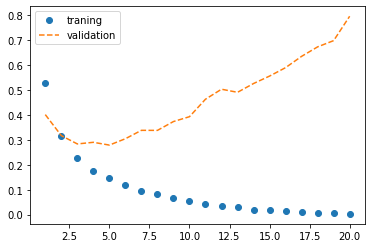

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epoch = range(1,len(loss_values)+1)
plt.plot(epoch, loss_values, "o", label = "traning")
plt.plot(epoch, val_loss_values, "--", label = "validation")
plt.legend()
plt.show

In [18]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.8928 - accuracy: 0.8393


[0.8928064703941345, 0.8392800092697144]

In [19]:
#Modelo pequeño
model2 = models.Sequential()
model2.add(layers.Dense(4, activation="relu", input_shape= (10000,)))
model2.add(layers.Dense(4, activation="relu"))
model2.add(layers.Dense(1, activation="sigmoid"))

model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

history2 = model2.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))



Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.5472 - accuracy: 0.7850 - val_loss: 0.4589 - val_accuracy: 0.8424
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3886 - accuracy: 0.8858 - val_loss: 0.3741 - val_accuracy: 0.8728
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3098 - accuracy: 0.9057 - val_loss: 0.3334 - val_accuracy: 0.8755
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2578 - accuracy: 0.9217 - val_loss: 0.3012 - val_accuracy: 0.8865
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2213 - accuracy: 0.9317 - val_loss: 0.2859 - val_accuracy: 0.8906
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1932 - accuracy: 0.9405 - val_loss: 0.2878 - val_accuracy: 0.8833
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1721 - accuracy: 0.9479 - val_loss: 0.2738 - val_accuracy: 0.8907
Epoch 8/20
30

In [20]:
from keras import regularizers
#Modelo con regularizacion
model3 = models.Sequential()
model3.add(layers.Dense(16, activation="relu", input_shape= (10000,),
                        kernel_regularizer= regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation="relu", kernel_regularizer= regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation="sigmoid"))

model3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

history3 = model3.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5548 - accuracy: 0.7935 - val_loss: 0.4378 - val_accuracy: 0.8663
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3685 - accuracy: 0.8964 - val_loss: 0.3617 - val_accuracy: 0.8843
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2970 - accuracy: 0.9194 - val_loss: 0.3379 - val_accuracy: 0.8894
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2608 - accuracy: 0.9308 - val_loss: 0.3329 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2411 - accuracy: 0.9381 - val_loss: 0.3489 - val_accuracy: 0.8803
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2226 - accuracy: 0.9471 - val_loss: 0.3376 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2110 - accuracy: 0.9505 - val_loss: 0.3420 - val_accuracy: 0.8844
Epoch 8/20
30

In [21]:
#Modelo Dropout
model4 = models.Sequential()
model4.add(layers.Dense(4, activation="relu", input_shape= (10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(4, activation="relu"))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation="sigmoid"))

model4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

history4 = model4.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.6699 - accuracy: 0.5641 - val_loss: 0.6212 - val_accuracy: 0.7907
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.6226 - accuracy: 0.6364 - val_loss: 0.5647 - val_accuracy: 0.8551
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5865 - accuracy: 0.6801 - val_loss: 0.5144 - val_accuracy: 0.8685
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5627 - accuracy: 0.7101 - val_loss: 0.4831 - val_accuracy: 0.8774
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5400 - accuracy: 0.7305 - val_loss: 0.4612 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5259 - accuracy: 0.7419 - val_loss: 0.4278 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5022 - accuracy: 0.7589 - val_loss: 0.4040 - val_accuracy: 0.8884
Epoch 8/20
30

<function matplotlib.pyplot.show>

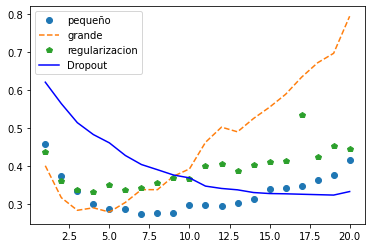

In [22]:
#Comparacion todos los modelos
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
val_loss_values2 = history2.history["val_loss"]
val_loss_values3 = history3.history["val_loss"]
val_loss_values4 = history4.history["val_loss"]

epoch = range(1,len(loss_values)+1)
plt.plot(epoch, val_loss_values2, "o", label = "pequeño")
plt.plot(epoch, val_loss_values, "--", label = "grande")
plt.plot(epoch, val_loss_values3, "p", label = "regularizacion")
plt.plot(epoch, val_loss_values4, "b", label = "Dropout")
plt.legend()
plt.show

In [23]:
#Evaluando todos los modelos
model.evaluate(x_test, y_test)
model2.evaluate(x_test, y_test) 
model3.evaluate(x_test, y_test)
model4.evaluate(x_test, y_test)
#El modelo con Dropout es el mejor 
#Tal vez usando Dropout y un modelo mas pequeño se puedan mejorar los resultados

782/782 [==============================] - 2s 2ms/step - loss: 0.3512 - accuracy: 0.8705


[0.35120147466659546, 0.8705199956893921]